In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pickle

2024-10-17 21:06:27.542045: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 21:06:27.543846: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 21:06:27.547606: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 21:06:27.557839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 21:06:27.574024: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# Setup directory paths to train and test images
train_dir = "/home/usd.local/neerajdattu.dudam/rizk_lab/shared/neerajdattu/dataset/Training"
test_dir = "/home/usd.local/neerajdattu.dudam/rizk_lab/shared/neerajdattu/dataset/Testing"

# Set up the data generators for training and testing images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer and a dense layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [5]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [6]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=test_generator)

# Get the training results
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Store the training results in a dictionary
trained_results = {
    'train_loss': train_loss,
    'test_loss': test_loss,
    'train_accuracy': train_accuracy,
    'test_accuracy': test_accuracy
}

# Save the training results to a file
with open('resnet_results.pkl', 'wb') as f:
    pickle.dump(trained_results, f)

# Save an object to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

/home/usd.local/neerajdattu.dudam/anaconda3/envs/pytorch/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 521ms/step - accuracy: 0.4703 - loss: 1.1935 - val_accuracy: 0.6247 - val_loss: 0.9889
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 66s 371ms/step - accuracy: 0.6650 - loss: 0.8388 - val_accuracy: 0.6552 - val_loss: 0.8521
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 382ms/step - accuracy: 0.6973 - loss: 0.7541 - val_accuracy: 0.6789 - val_loss: 0.8870
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 379ms/step - accuracy: 0.7195 - loss: 0.7196 - val_accuracy: 0.7056 - val_loss: 0.7708
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 379ms/step - accuracy: 0.7356 - loss: 0.6649 - val_accuracy: 0.6583 - val_loss: 0.8085
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 374ms/step - accuracy: 0.7381 - loss: 0.6533 - val_accuracy: 0.7140 - val_loss: 0.7370
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 67s 373ms/step - accuracy: 0.7507 - loss: 0.6040 - val_accuracy: 0.7094 - val_loss: 0.6729
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 72s 401ms/step - accuracy: 0.7785 - loss: 0

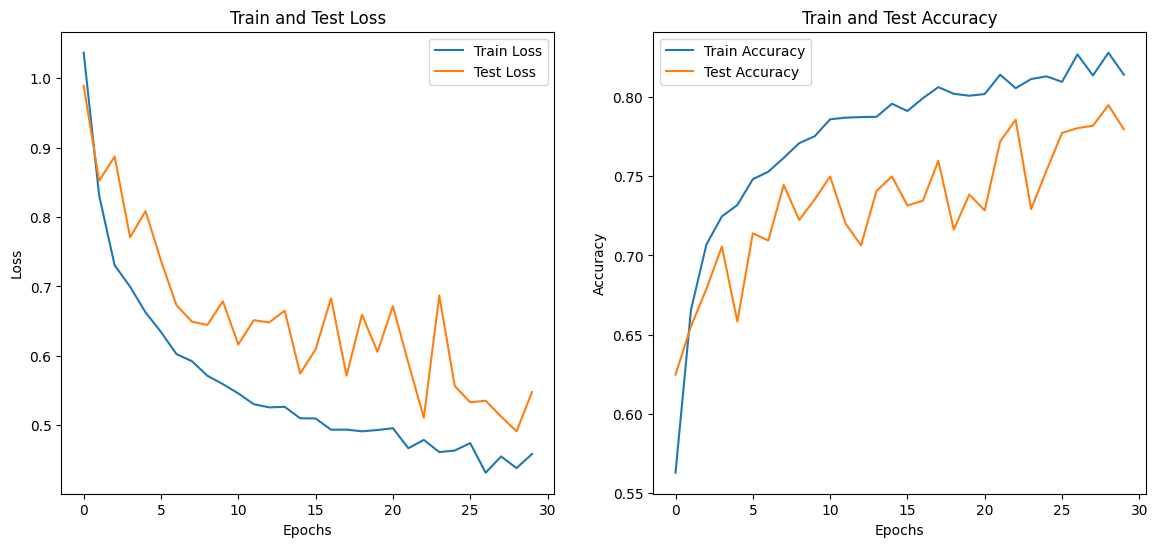

In [7]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 31s 756ms/step


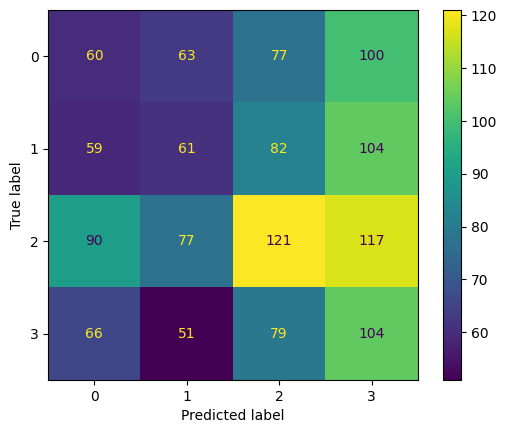

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get the true labels from the test generator
true_labels = test_generator.classes

# Get the predicted labels from the model
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='viridis')
plt.show()